# [ロジスティック回帰] 学習時間とスマホの操作時間から合否を判定する
Copyright © 2022 田中裕行 All rights reserved.

## (1) 学習データを用意する

In [1]:
import pandas as pd

study  = [5, 3, 2, 4, 1] # 学習時間
mobile = [2, 1, 5, 2, 4] # スマホの利用時間
result = [1, 1, 0, 1, 0] # 合否結果
df = pd.DataFrame(list(zip(study,mobile,result)), columns = ['study','mobile', 'result'])
df

,study,mobile,result
0,5,2,1
1,3,1,1
2,2,5,0
3,4,2,1
4,1,4,0


## (2) データの内訳を確認する

In [2]:
# 合否結果の種類を確認
print(df['result'].unique())

[1 0]


In [3]:
# 合格と不合格の数を確認
print('合格  ：' ,len(df.loc[df['result']==1]))
print('不合格：' ,len(df.loc[df['result']==0]))

合格  ： 3
不合格： 2


## (3) グラフで視覚化する

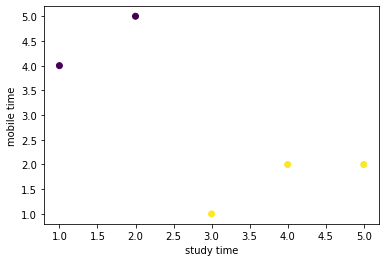

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['study'] ,df['mobile'], c=df['result'])
plt.xlabel('study time')                  
plt.ylabel('mobile time')
plt.show()

## (4) 学習する変数を分ける

In [5]:
X = df[['study','mobile']] # 説明変数(学習時間、スマホの操作時間)
y = df['result']           # 目的変数(合否結果)

## (5) 機械に学習させる

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(X, y)

## (6) テストデータを作成する

In [7]:
test_study  = [3] # 学習時間(3時間)
test_mobile = [3] # スマホの利用時間(3時間)
df2 = pd.DataFrame(list(zip(test_study, test_mobile)), columns = ['study','mobile'])
df2

,study,mobile
0,3,3


## (7) 機械に予測させる

In [8]:
y_pred = log_reg.predict(df2)
if y_pred[0] == 1:
  ans = '合格'
else:
  ans = '不合格'
print('学習が{}時間、スマホの利用が{}時間だと、{}です。'
  .format(test_study[0],test_mobile[0] ,ans))

学習が3時間、スマホの利用が3時間だと、合格です。
